Lab 20: Regression Example on Boston Housing Data

In [29]:
import numpy as np
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [9]:

# Load the Boston Housing dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Normalize the data
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std


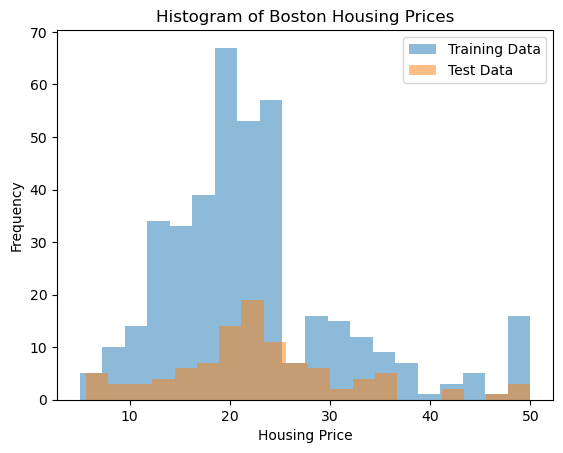

In [22]:
# Plot a histogram of the training and test data housing prices
plt.hist(y_train, bins=20, alpha=0.5, label='Training Data')
plt.hist(y_test, bins=20, alpha=0.5, label='Test Data')
plt.xlabel('Housing Price')
plt.ylabel('Frequency')
plt.title('Histogram of Boston Housing Prices')
plt.legend()
plt.show()


In [14]:

# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               1792      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [56]:

# Compile the model
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

# Train the model
#history = model.fit(x_train, y_train, epochs=5000, batch_size=32, verbose=0)
history = model.fit(x_train, y_train, epochs=500, batch_size=32, verbose=0, validation_split=0.2)


In [57]:

# Evaluate the model
mse, mae = model.evaluate(x_test, y_test, verbose=0)
print(f'Test MSE: {mse:.3f}, Test MAE: {mae:.3f}')

# Make predictions
y_pred = model.predict(x_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {rmse:.3f}')

# Calculate RMSE
t_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {t_mae:.3f}')

Test MSE: 14.720, Test MAE: 2.418
4/4 [==============================] - 0s 1ms/step
Test RMSE: 3.837
Test MAE: 2.418


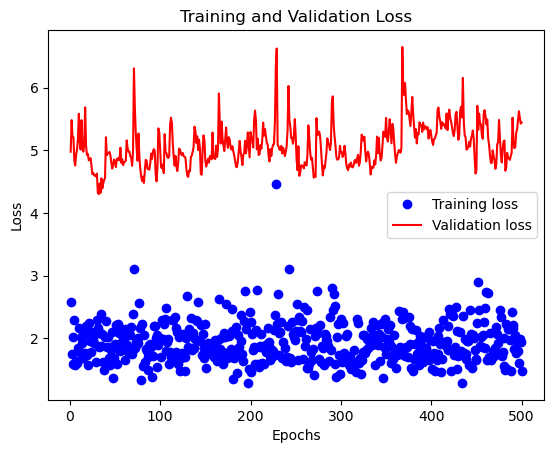

In [61]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()